# <p><span style="color:darkblue">Neural Style Transfer</span></p>

## Import libraries

In [1]:
import torch
from torch import nn
from torchvision import models
from matplotlib import pyplot as plt

from __init__ import Compiler
from trainer import Trainer
from utils1 import ImageLoader, ImageShow

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
vgg19 = models.vgg19(pretrained=True).features.eval()

contentLayerNames = ['conv4']
styleLayerNames = ['conv1', 'conv2', 'conv3', 'conv4', 'conv5']

C:\Users\dell7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\dell7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Experiment 1

In [4]:
from PIL import Image

# Load your image
image = Image.open(r"D:\gpu coding\2135.jpg")

# Get the size (width, height)
print(image.size)


(1800, 2400)


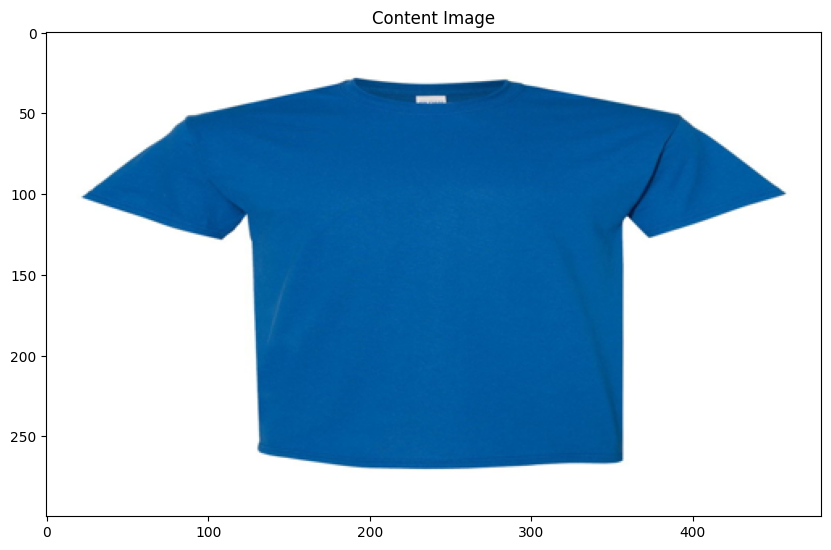

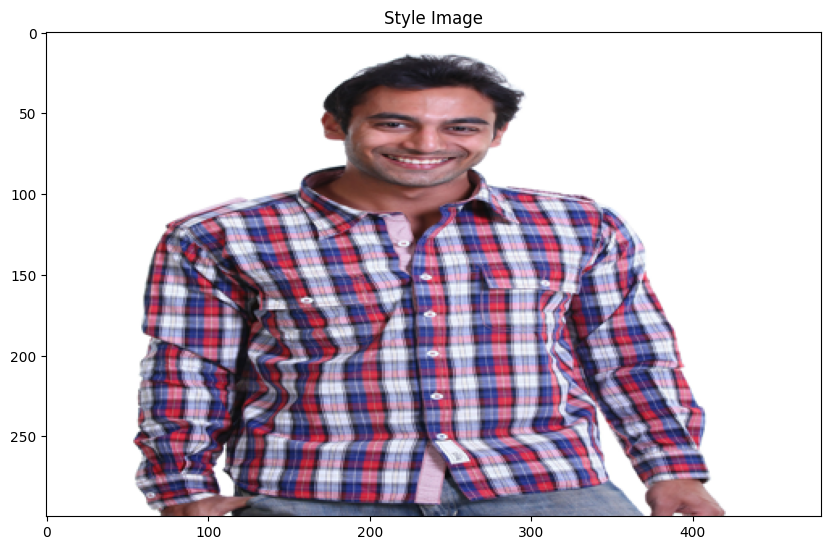

In [2]:
contentImage = ImageLoader(r"D:\gpu coding\6629ca9a35705b3f2f7d29e8-men-heavy-cotton-multi-colors-t-shirt.jpg")
styleImage = ImageLoader(r"D:\gpu coding\2135.jpg")

ImageShow(contentImage, title='Content Image')
ImageShow(styleImage, title='Style Image')

## Compile

In [4]:
compiler = Compiler(vgg19, contentLayerNames, styleLayerNames, device)
model, contentLayers, styleLayers = compiler.compile(contentImage, styleImage, device)

## Train

In [5]:
trainer = Trainer(model, contentLayers, styleLayers, device)

inputImage = contentImage.clone()
losses, outImage = trainer.fit(inputImage)

Epoch 1/30 --- Total Loss: 927.3939 
Content Loss: 24.190767 --- Style Loss : 903.203094
---------------------------------------------------
Epoch 2/30 --- Total Loss: 246.3534 
Content Loss: 25.370373 --- Style Loss : 220.982984
---------------------------------------------------
Epoch 3/30 --- Total Loss: 143.8695 
Content Loss: 25.626637 --- Style Loss : 118.242853
---------------------------------------------------
Epoch 4/30 --- Total Loss: 105.9945 
Content Loss: 25.664368 --- Style Loss : 80.330145
---------------------------------------------------
Epoch 5/30 --- Total Loss: 85.9616 
Content Loss: 25.702578 --- Style Loss : 60.259044
---------------------------------------------------
Epoch 6/30 --- Total Loss: 73.1270 
Content Loss: 25.725389 --- Style Loss : 47.401569
---------------------------------------------------
Epoch 7/30 --- Total Loss: 64.3726 
Content Loss: 25.735914 --- Style Loss : 38.636688
---------------------------------------------------
Epoch 8/30 --- Total

## Results

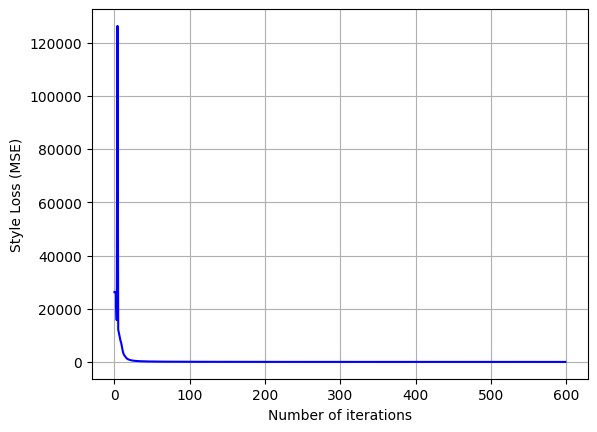

In [6]:
tloss = losses['total']
closs = losses['content']
sloss = losses['style']

plt.plot(sloss, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Style Loss (MSE)')
plt.grid()

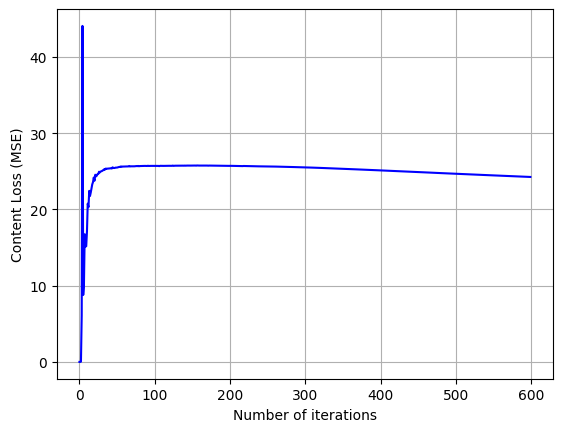

In [7]:
plt.plot(closs, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Content Loss (MSE)')
plt.grid()

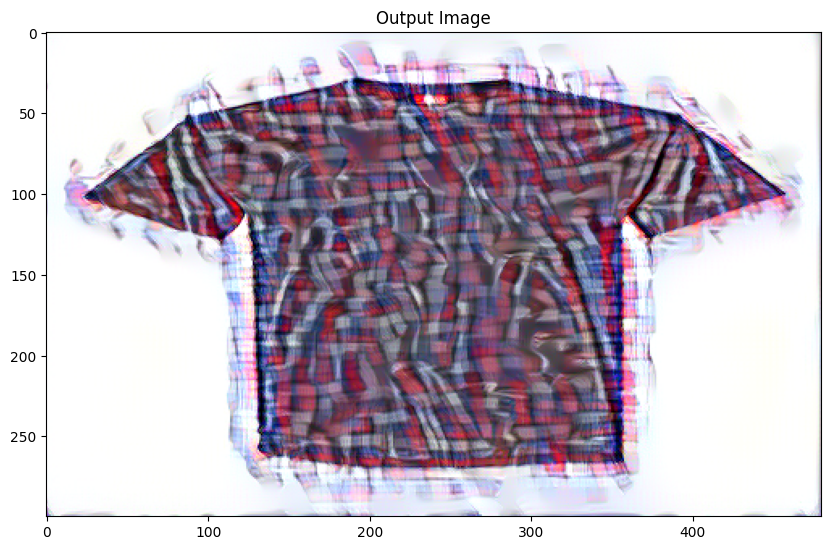

In [8]:
ImageShow(outImage, title='Output Image')

cuda:0


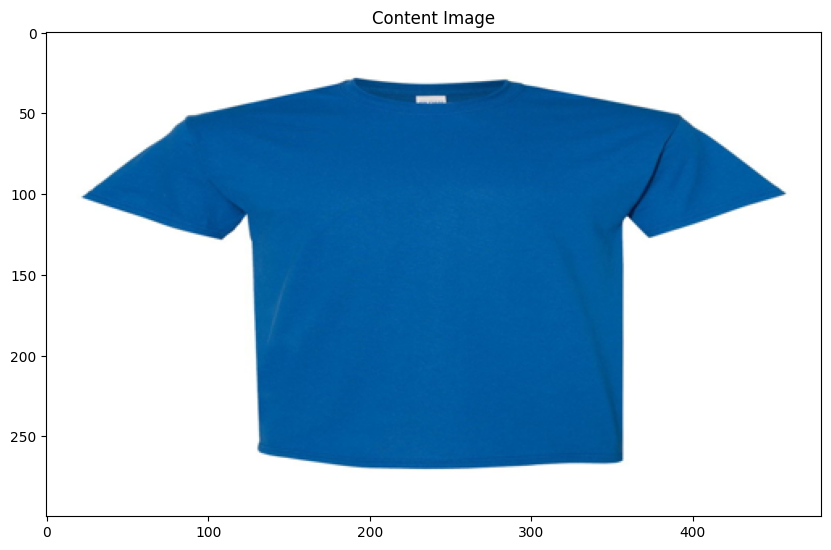

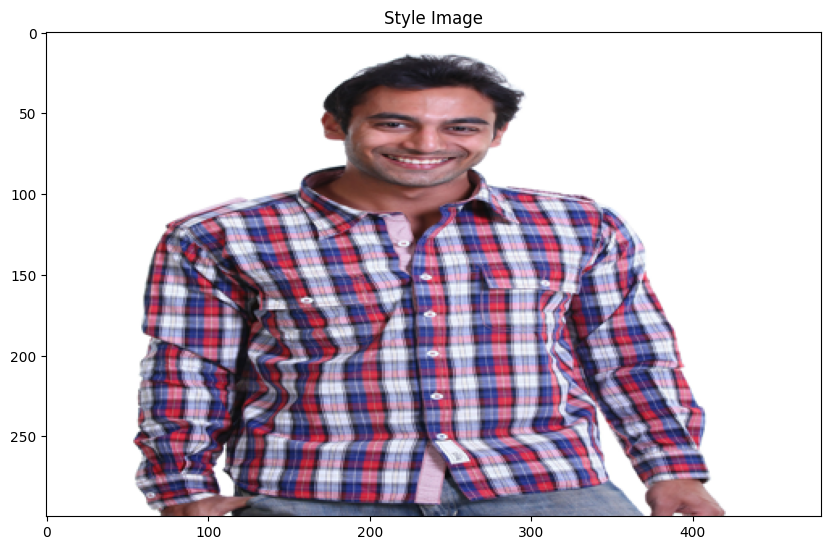

Epoch 1/300 --- Total Loss: 94713.9844
Content Loss: 2421.8920 --- Style Loss: 91069.9076
Texture Loss: 1.1829 --- Smoothness Loss: 1221.0045
---------------------------------------------------
Epoch 2/300 --- Total Loss: 25782.5156
Content Loss: 2532.1323 --- Style Loss: 22033.3604
Texture Loss: 1.2919 --- Smoothness Loss: 1215.7300
---------------------------------------------------
Epoch 3/300 --- Total Loss: 15572.2910
Content Loss: 2552.1132 --- Style Loss: 11809.3623
Texture Loss: 1.2998 --- Smoothness Loss: 1209.5161
---------------------------------------------------
Epoch 4/300 --- Total Loss: 11808.1299
Content Loss: 2561.6144 --- Style Loss: 8042.8828
Texture Loss: 1.3044 --- Smoothness Loss: 1202.3283
---------------------------------------------------
Epoch 5/300 --- Total Loss: 9781.2256
Content Loss: 2564.8924 --- Style Loss: 6018.0246
Texture Loss: 1.3041 --- Smoothness Loss: 1197.0047
---------------------------------------------------
Epoch 6/300 --- Total Loss: 8482.

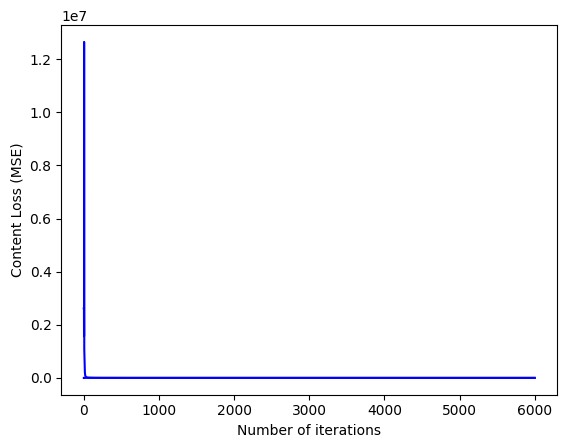

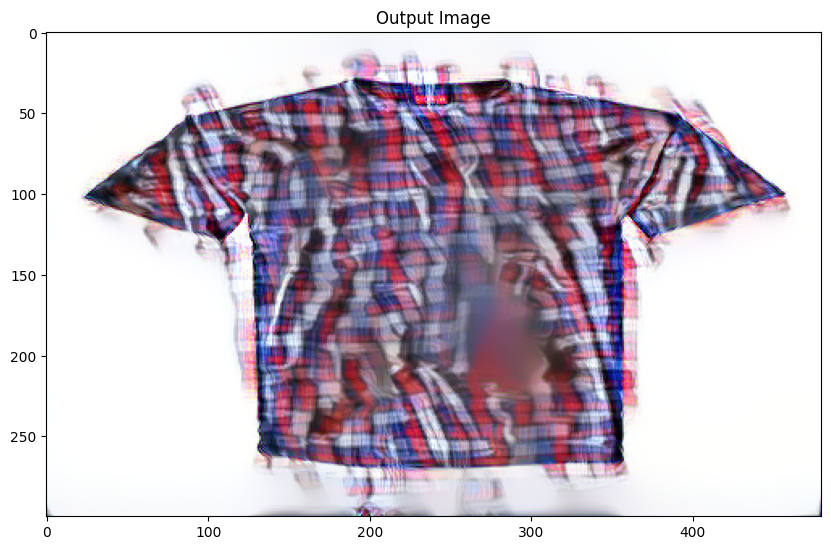

In [10]:
import torch
from torch import nn
from torchvision import models
from matplotlib import pyplot as plt

from __init__ import Compiler
from trainer import Trainer
from utils1 import ImageLoader, ImageShow

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Load pre-trained VGG19 model
vgg19 = models.vgg19(pretrained=True).features.eval()

# Specify content and style layers
contentLayerNames = ['conv4']
styleLayerNames = ['conv1', 'conv2', 'conv3', 'conv4', 'conv5']

# Define the target size for resizing both content and style images
target_size = (480, 300)

# Load content and style images
contentImage = ImageLoader(r"D:\gpu coding\6629ca9a35705b3f2f7d29e8-men-heavy-cotton-multi-colors-t-shirt.jpg", size=target_size)
styleImage = ImageLoader(r"D:\gpu coding\2135.jpg", size=target_size)

# Display content and style images
ImageShow(contentImage, title='Content Image')
ImageShow(styleImage, title='Style Image')

# Compile the model for content, style, texture, and smoothness loss
compiler = Compiler(vgg19, contentLayerNames, styleLayerNames, device)
model, contentLayers, styleLayers, textureLayers, smoothnessLayers = compiler.compile(contentImage, styleImage, device)

# Train the model with content, style, texture, and smoothness losses
trainer = Trainer(model, contentLayers, styleLayers, textureLayers, smoothnessLayers, device)

# Clone the content image to be used as input for training
inputImage = contentImage.clone()

# Increase style loss weight to let style have more influence on the output
losses, outImage = trainer.fit(inputImage, epochs=300, alpha=1e2, betta=1e8, gamma=1e2, delta=1e2, epsilon=1e-3)

# Plot and display the output
tloss = losses['total']
closs = losses['content']
sloss = losses['style']

plt.plot(sloss, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Style Loss (MSE)')
plt.grid()

plt.plot(closs, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Content Loss (MSE)')
plt.grid()

# Display final image
ImageShow(outImage, title='Output Image')



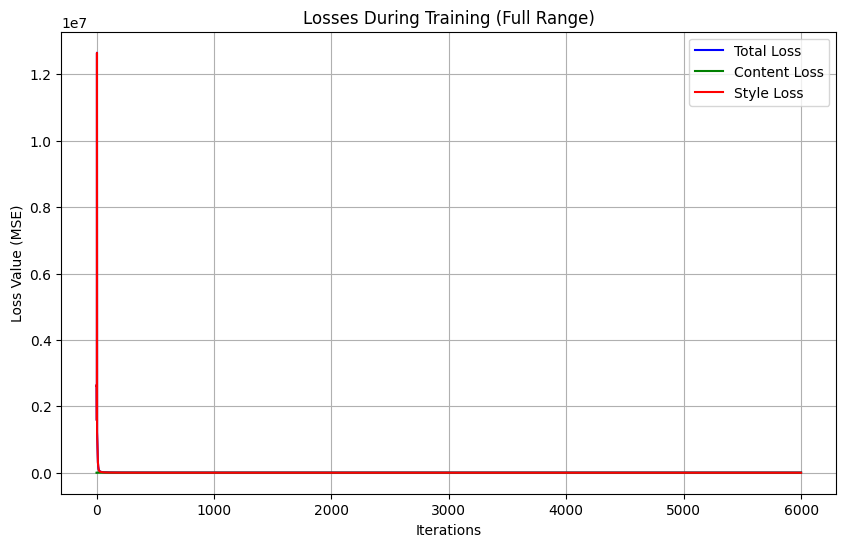

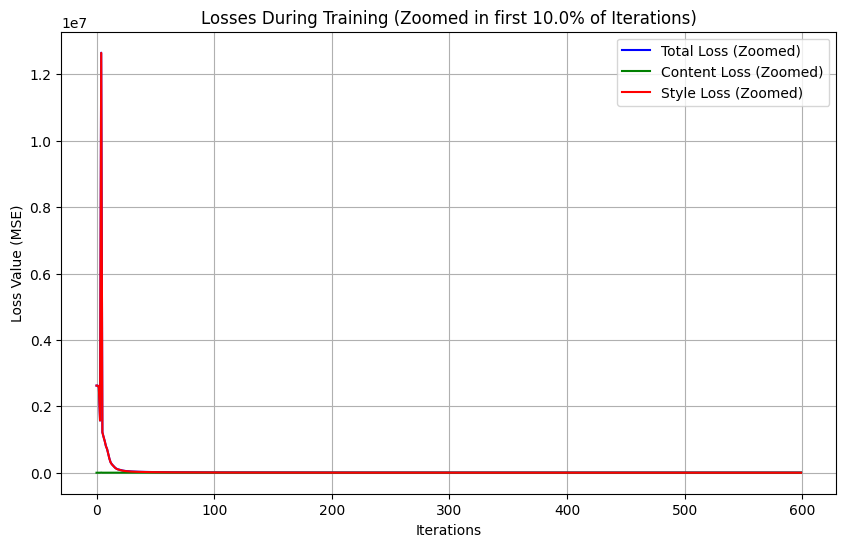

In [11]:
# Improved plotting function to zoom in on early iterations for better visibility
def plot_losses_with_zoom(losses, epochs, zoom_factor=0.1):
    total_loss = losses['total']
    content_loss = losses['content']
    style_loss = losses['style']
    
    # Plot the entire loss graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(total_loss)), total_loss, label='Total Loss', color='blue')
    plt.plot(range(len(content_loss)), content_loss, label='Content Loss', color='green')
    plt.plot(range(len(style_loss)), style_loss, label='Style Loss', color='red')
    
    plt.title('Losses During Training (Full Range)')
    plt.xlabel('Iterations')
    plt.ylabel('Loss Value (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Zoom in on the first part of the graph to visualize minute variations
    zoomed_length = int(len(total_loss) * zoom_factor)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(zoomed_length), total_loss[:zoomed_length], label='Total Loss (Zoomed)', color='blue')
    plt.plot(range(zoomed_length), content_loss[:zoomed_length], label='Content Loss (Zoomed)', color='green')
    plt.plot(range(zoomed_length), style_loss[:zoomed_length], label='Style Loss (Zoomed)', color='red')
    
    plt.title(f'Losses During Training (Zoomed in first {zoom_factor * 100}% of Iterations)')
    plt.xlabel('Iterations')
    plt.ylabel('Loss Value (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot both full range and zoomed-in losses
plot_losses_with_zoom(losses, epochs=300, zoom_factor=0.1)  # Adjust zoom_factor as needed (0.1 = 10% of iterations)


In [13]:
import torch.nn.functional as F

# Function to calculate PSNR (Peak Signal-to-Noise Ratio)
def calculate_psnr(img1, img2, device='cuda:0'):
    # Ensure the images are on the same device
    img1 = img1.to(device)
    img2 = img2.to(device)
    
    # Convert images to float and ensure they're within [0, 1]
    img1 = img1.clamp(0, 1)
    img2 = img2.clamp(0, 1)
    
    # Calculate Mean Squared Error (MSE)
    mse = F.mse_loss(img1, img2)
    
    # If MSE is zero, the images are identical, return the max PSNR
    if mse == 0:
        return 100  # Maximum PSNR for identical images
    
    # Compute PSNR based on MSE
    psnr = 10 * torch.log10(1 / mse)  # Assuming images are normalized to [0, 1]
    return psnr.item()

# Ensure contentImage and outImage are moved to the same device (cuda or cpu)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
contentImage = contentImage.to(device)
outImage = outImage.to(device)

# Calculate PSNR between content and generated image
psnr_value = calculate_psnr(contentImage, outImage, device=device)
print(f"PSNR between content and generated image: {psnr_value:.2f} dB")



PSNR between content and generated image: 12.41 dB


## Experiment 2

In [ ]:
contentImage = ImageLoader("images/rome.jpg")
styleImage = ImageLoader("images/dali.jpg")

ImageShow(contentImage, title='Content Image')
ImageShow(styleImage, title='Style Image')

## Compile model

In [10]:
compiler = Compiler(vgg19, contentLayerNames, styleLayerNames, device)
model, contentLayers, styleLayers = compiler.compile(contentImage, styleImage, device)

## Train

In [ ]:
trainer = Trainer(model, contentLayers, styleLayers, device)

inputImage = contentImage.clone()
losses, outImage = trainer.fit(inputImage)

## Results

In [ ]:
tloss = losses['total']
closs = losses['content']
sloss = losses['style']

plt.plot(sloss, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Style Loss (MSE)')
plt.grid()

In [ ]:
plt.plot(closs, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Content Loss (MSE)')
plt.grid()

In [ ]:
ImageShow(outImage, title='Output Image')